# Analysis of Fortune Five hundred companies 1955-2005
The following analysis is based on the revenues and profits earned by the top 500 companies over 50 years.<br>
<img src="../images/500.jpeg" alt="Fortune 500" style="width: 800px; align:center;"/>

## Step 1: Import Python Libraries we will Need
Import Python libraries we will need:<br>
**Pandas** <br>
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.<br>
**Matplotlib** <br> Mathplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.<br>

**Seaborn** <br>
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




In [1]:
# Import
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

## Step 2: Read the data from the 
Read/import the data.

In [2]:
df = pd.read_csv('../data/fortune500.csv')

## Step 3: Investigate Data
Examine a sample of data

In [3]:
df.head(2)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8


In [4]:
df.tail(2)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [6]:
# Or get the rows and columns 
df.shape

(25500, 5)

## Step 4 -Data Cleansing
Examine data to find missing data, and analyise the significence of the missing data.

In [7]:
# Change column names to simpler names
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [8]:
# Search for non-numeric information in the profit column and creat new df 
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
# Output the rows that have non_numberic_profits = True
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
# Create a SET of data
set(df.profit[non_numberic_profits])

{'N.A.'}

In [10]:
len(df.profit[non_numberic_profits])

369

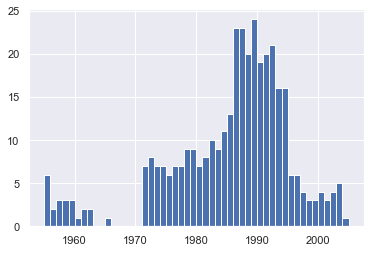

In [11]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

Clense the data by removing rows with missing data

In [12]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

/Users/morgan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Get the lenght of our dataframe

In [13]:
len(df)

25131

In [14]:
df.shape

(25131, 5)

## Step 5: Export to CSV
Exporting data to a csv file is relatively simple.



In [15]:
# Export
df.to_csv('Fortune500_clean.csv', index = False)

In [16]:
df.head(2)
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Step 6: Analysis of Data

Plot the average profit over the years 1955-2005

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

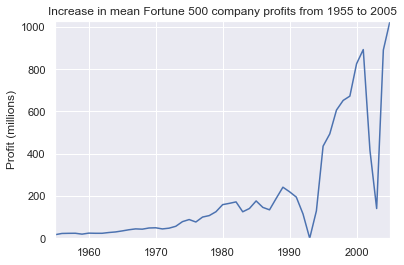

In [18]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

Wow, that looks like an exponential, but it’s got some huge dips. They must correspond to the early 1990s recession and the dot-com bubble. It’s pretty interesting to see that in the data. But how come profits recovered to even higher levels post each recession?

Maybe the revenues can tell us more.

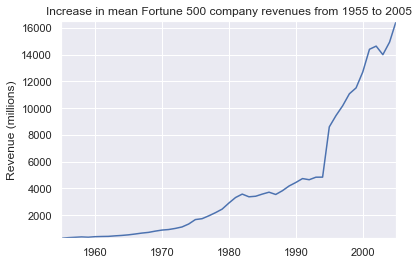

In [19]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

That adds another side to the story. Revenues were not as badly hit — that’s some great accounting work from the finance departments.

With a little help from Stack Overflow, we can superimpose these plots with +/- their standard deviations.

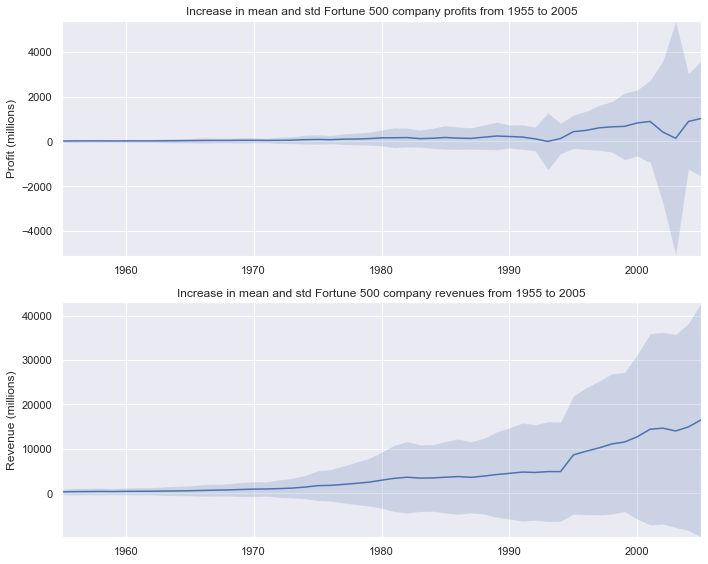

In [20]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    
fig, (ax1, ax2) = plt.subplots(nrows= 2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(10, 8)
fig.tight_layout()

That’s staggering, the standard deviations are huge! Some Fortune 500 companies make billions while others lose billions, and the risk has increased along with rising profits over the years.

Perhaps some companies perform better than others; are the profits of the top 10% more or less volatile than the bottom 10%?

In [21]:
df.shape

(25131, 5)

In [22]:
df.sort_values(by='rank', ascending=False)

,year,rank,company,revenue,profit
25499,2005,500,Cincinnati Financial,3614.0,584.0
1999,1958,500,Akzona,64.7,1.3
5499,1965,500,Draper,97.1,6.0
999,1956,500,Warren (S.D.),55.1,2.9
8499,1971,500,Arvin Industries,165.8,2.7
...,...,...,...,...,...
19500,1994,1,General Motors,133621.9,2465.8
2500,1960,1,General Motors,11233.1,873.1
12500,1980,1,Exxon Mobil,79106.5,4295.2
12000,1979,1,General Motors,63221.1,3508.0


In [23]:
# df

In [24]:
filt = (df['company']=='Microsoft')
df_gm = df.loc[filt, ['year','revenue','profit']]
years = df_gm['year']
profit = df_gm['profit']
revenue = df_gm['revenue']
df_sfi = df[df['company'].str.contains("State Farm Insurance", na=False)] 


       year  revenue  profit
20249  1995   4649.0  1146.0
20718  1996   5937.0  1453.0
21171  1997   8671.0  2195.0
21636  1998  11358.0  3454.0
22108  1999  14484.0  4490.0
22583  2000  19747.0  7785.0
23078  2001  22956.0  9421.0
23571  2002  25296.0  7346.0
24046  2003  28365.0  7829.0
24545  2004  32187.0  9993.0
25040  2005  36835.0  8168.0


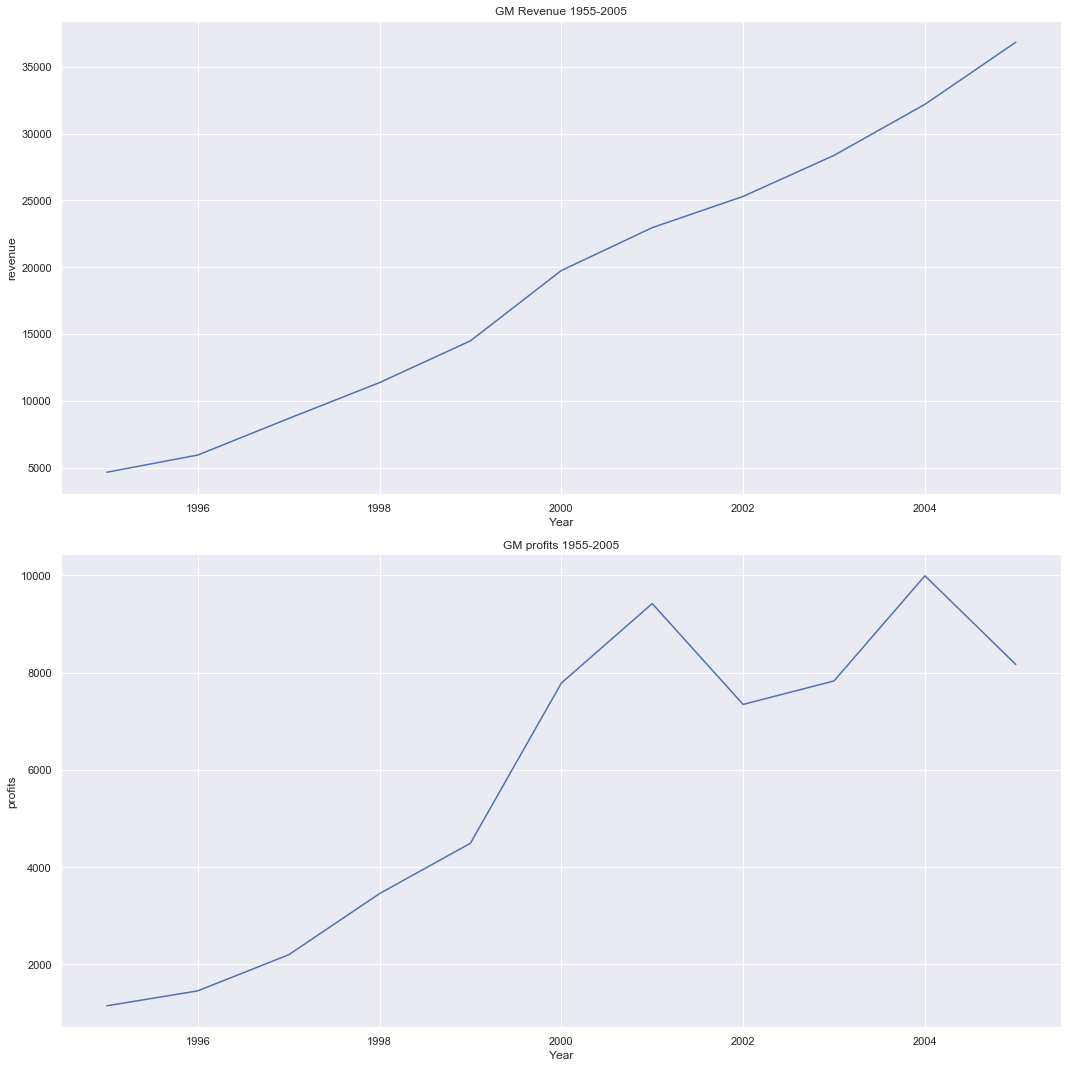

In [25]:
filt = (df['company']=='Microsoft')
df_gm = df.loc[filt, ['year','revenue','profit']]
years = df_gm['year']
profit = df_gm['profit']
revenue = df_gm['revenue']
print(df_gm)
fig, (ax1,ax2) = plt.subplots(nrows= 2,ncols= 1,figsize=(15,15))
ax1.plot(years,revenue, label = revenue)
ax2.plot(years,profit, label = profit)

# //ax1.legend()
ax1.set_title('GM Revenue 1955-2005')
ax1.set_xlabel('Year')
ax1.set_ylabel('revenue')

# ax2.legend()
ax2.set_title('GM profits 1955-2005')
ax2.set_xlabel('Year')
ax2.set_ylabel('profits')

# f, axs = plt.subplots(2,2,figsize=(15,15))
plt.tight_layout()
plt.show()

       rank  year  revenue  profit
20011    12  1995  38850.1  -244.3
20511    12  1996  40809.9  1271.2
21011    12  1997  42781.2  2567.9
21512    13  1998  43957.0  3833.3
22011    12  1999  47678.0  1704.0
22514    15  2000  44637.2  1034.1
23020    21  2001  47863.1   408.1
23524    25  2002  46705.2 -4995.7
24020    21  2003  49653.7 -2795.5
24517    18  2004  56064.6  2825.9
25018    19  2005  58818.9  5308.6


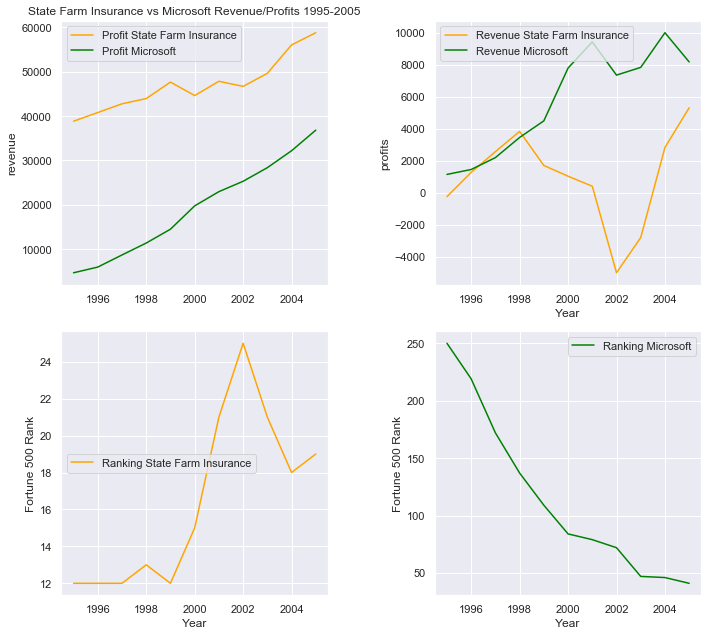

In [26]:
# df_sfi = df[df['company'].str.contains("State Farm Insurance Cos", na=False)] 

df_sfi = df.loc[filt, ['company','rank','year','revenue','profit']]

filt = (df['company']=='Microsoft')
df_ms = df.loc[filt, ['year','revenue','profit','rank']]
years_ms = df_ms['year']
profit_ms = df_ms['profit']
revenue_ms = df_ms['revenue']
ranking_ms = df_ms['rank']
# Sate Farm Insurance
filt = (df['company']=='State Farm Insurance Cos')
df_sfi = df.loc[filt, ['rank','year','revenue','profit']]
years_sfi = df_sfi['year']
profit_sfi = df_sfi['profit']
revenue_sfi = df_sfi['revenue']
ranking_sfi = df_sfi['rank']
print(df_sfi)

# Plotting 
fig, axes = plt.subplots(nrows= 2,ncols= 2,figsize=(10,9), sharex= False)
axes[0, 0].plot(years_sfi,revenue_sfi, label = revenue,color = 'orange' )
axes[0, 0].plot(years_sfi,revenue_ms, label = revenue,color = 'green' )

axes[0, 1].plot(years_ms,profit_sfi, label = profit,color = 'orange')
axes[0, 1].plot(years_sfi,profit_ms, label = profit,color = 'green')

axes[1, 0].plot(years_sfi,ranking_sfi,color = 'orange')

axes[1, 1].plot(years_sfi,ranking_ms,color = 'green')

axes[0, 0].legend(["Profit State Farm Insurance","Profit Microsoft"])
axes[0, 0].set_title('State Farm Insurance vs Microsoft Revenue/Profits 1995-2005')
# ax1.set_xlabel('Year')
axes[0, 0].set_ylabel('revenue')

axes[0, 1].legend(["Revenue State Farm Insurance","Revenue Microsoft"])
# ax2.set_title('State Farm Insurance 1995-2005')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('profits')

axes[1, 0].legend(["Ranking State Farm Insurance","Ranking Microsoft"])
# ax2.set_title('State Farm Insurance 1995-2005')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Fortune 500 Rank')

axes[1, 1].legend(["Ranking Microsoft","Ranking Microsoft"])
# ax2.set_title('State Farm Insurance 1995-2005')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Fortune 500 Rank')

plt.tight_layout()
plt.show()

Morgan McKnight version 1.2